In [26]:
from zipfile import ZipFile

In [27]:
zip = ZipFile('dataset.zip')
zip.extractall()

In [28]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import matplotlib.image as mpimg


In [29]:
cur_dir = os.getcwd()
cur_dir

'/home/akshrame'

In [30]:
main_folder = cur_dir + "/dataset/"
main_folder 

'/home/akshrame/dataset/'

In [31]:
img_paths=[]
for i in os.listdir(main_folder):
    for root, dirs, files in os.walk(main_folder+i):
        for f in files[:1]:    
            img_path =main_folder+i+"/"+f
            img_paths.append((img_path,i))


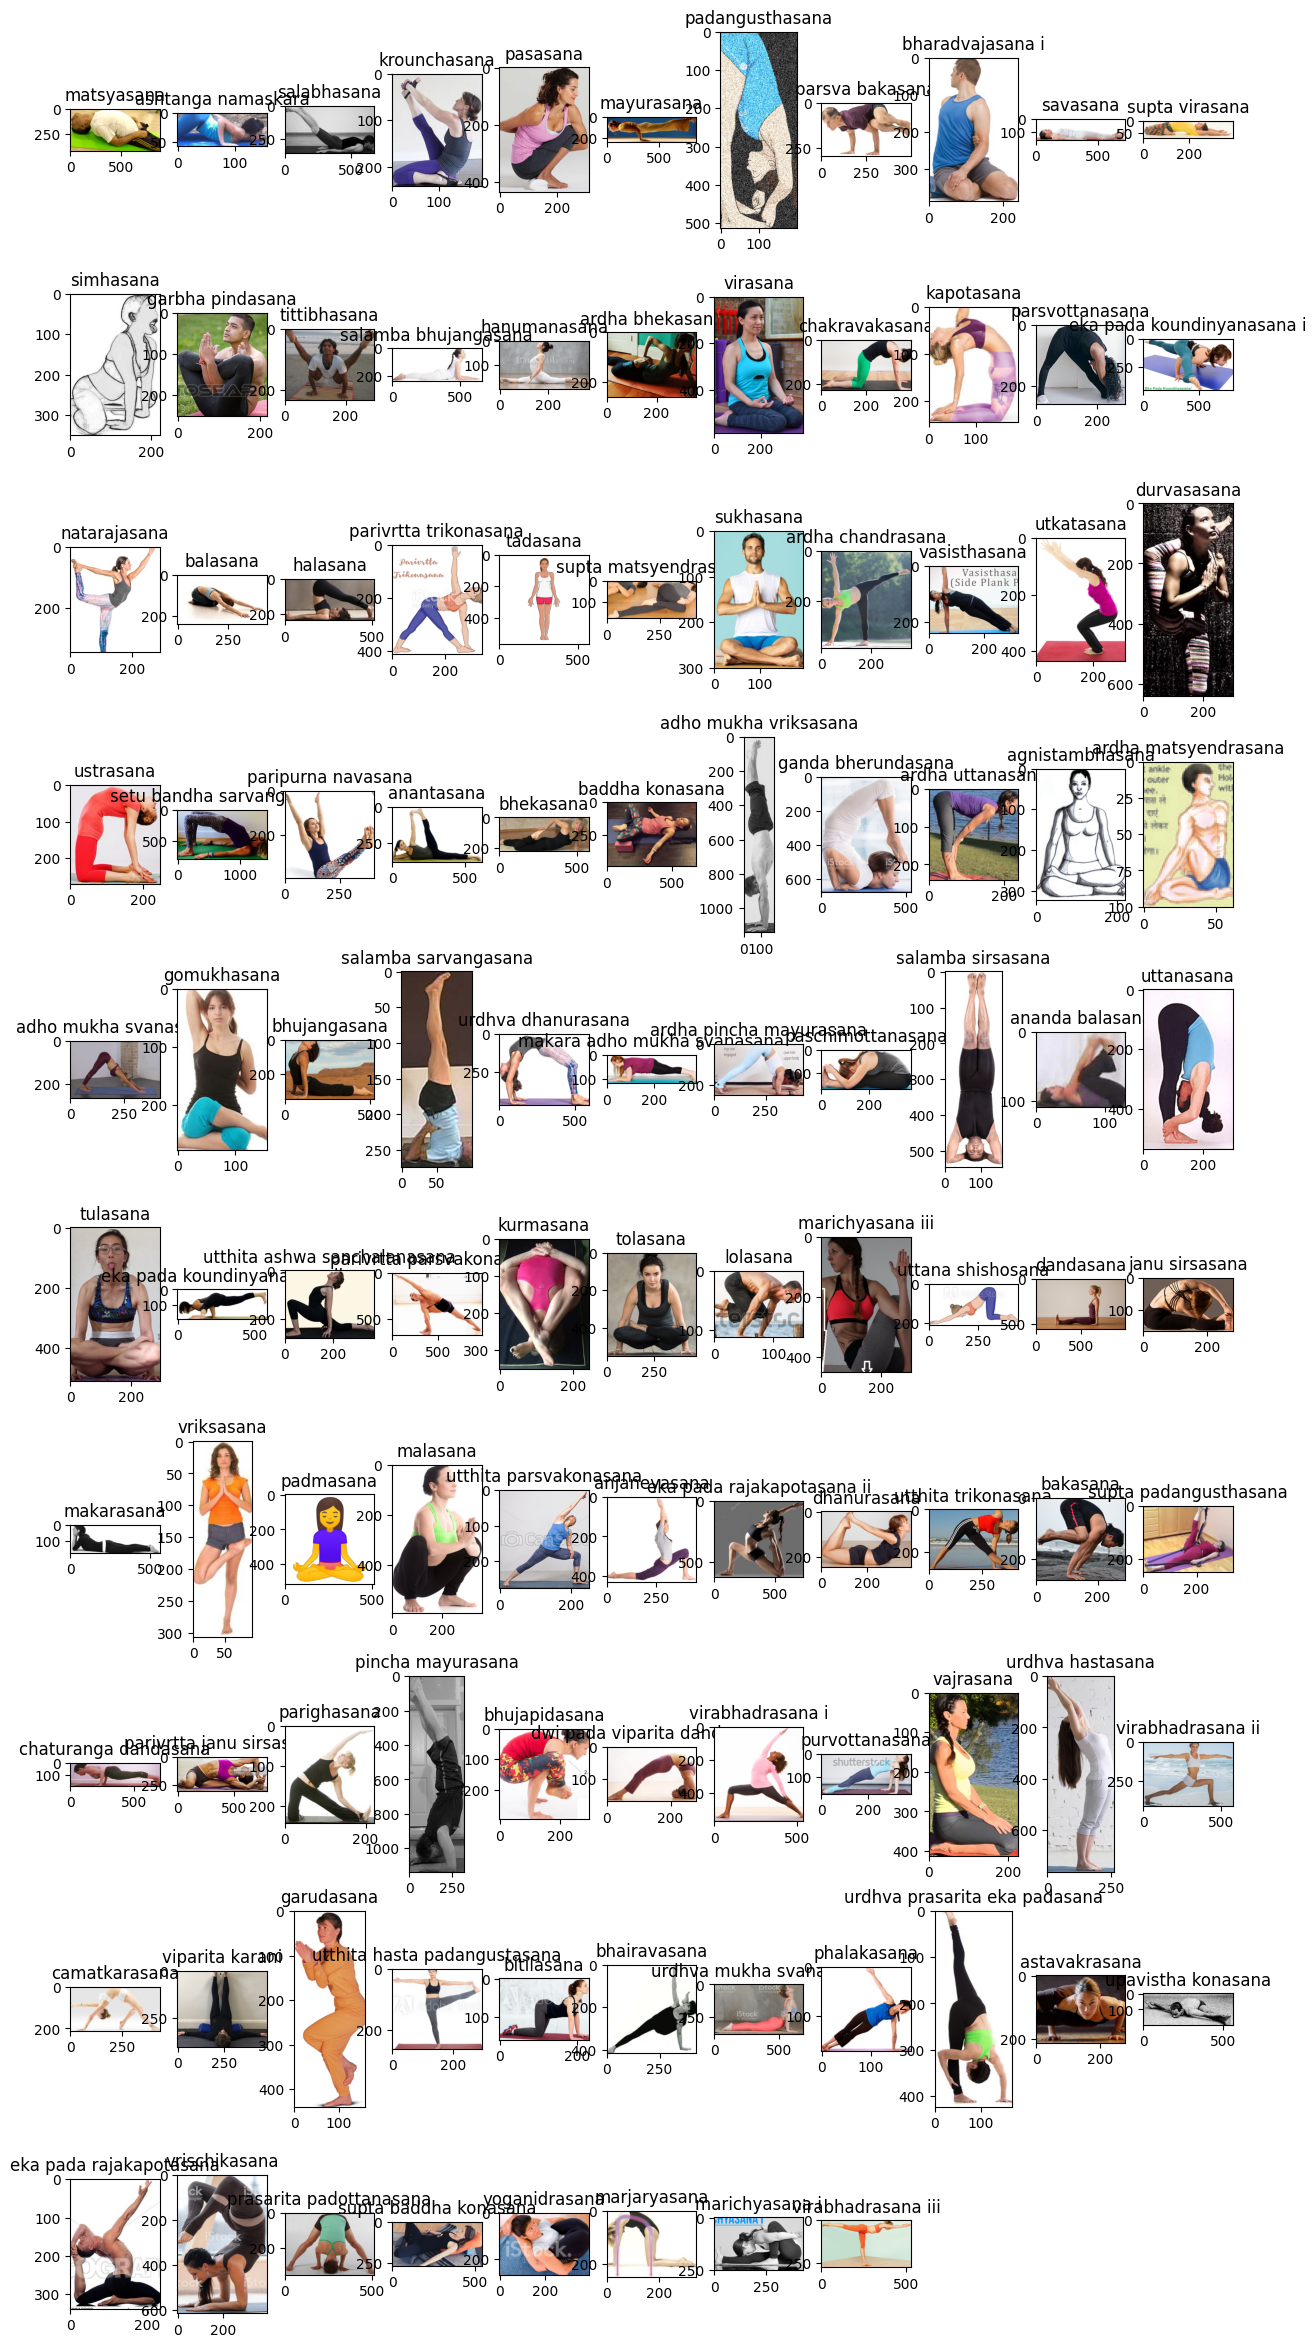

In [32]:
plt.figure(figsize=(15,30))
for i in range(len(img_paths)):
    plt.subplot(10,11,i+1)
    plt.imshow(mpimg.imread(img_paths[i][0]))
    plt.title(img_paths[i][1])
plt.show()

In [33]:
WIDTH=300
HEIGHT=450

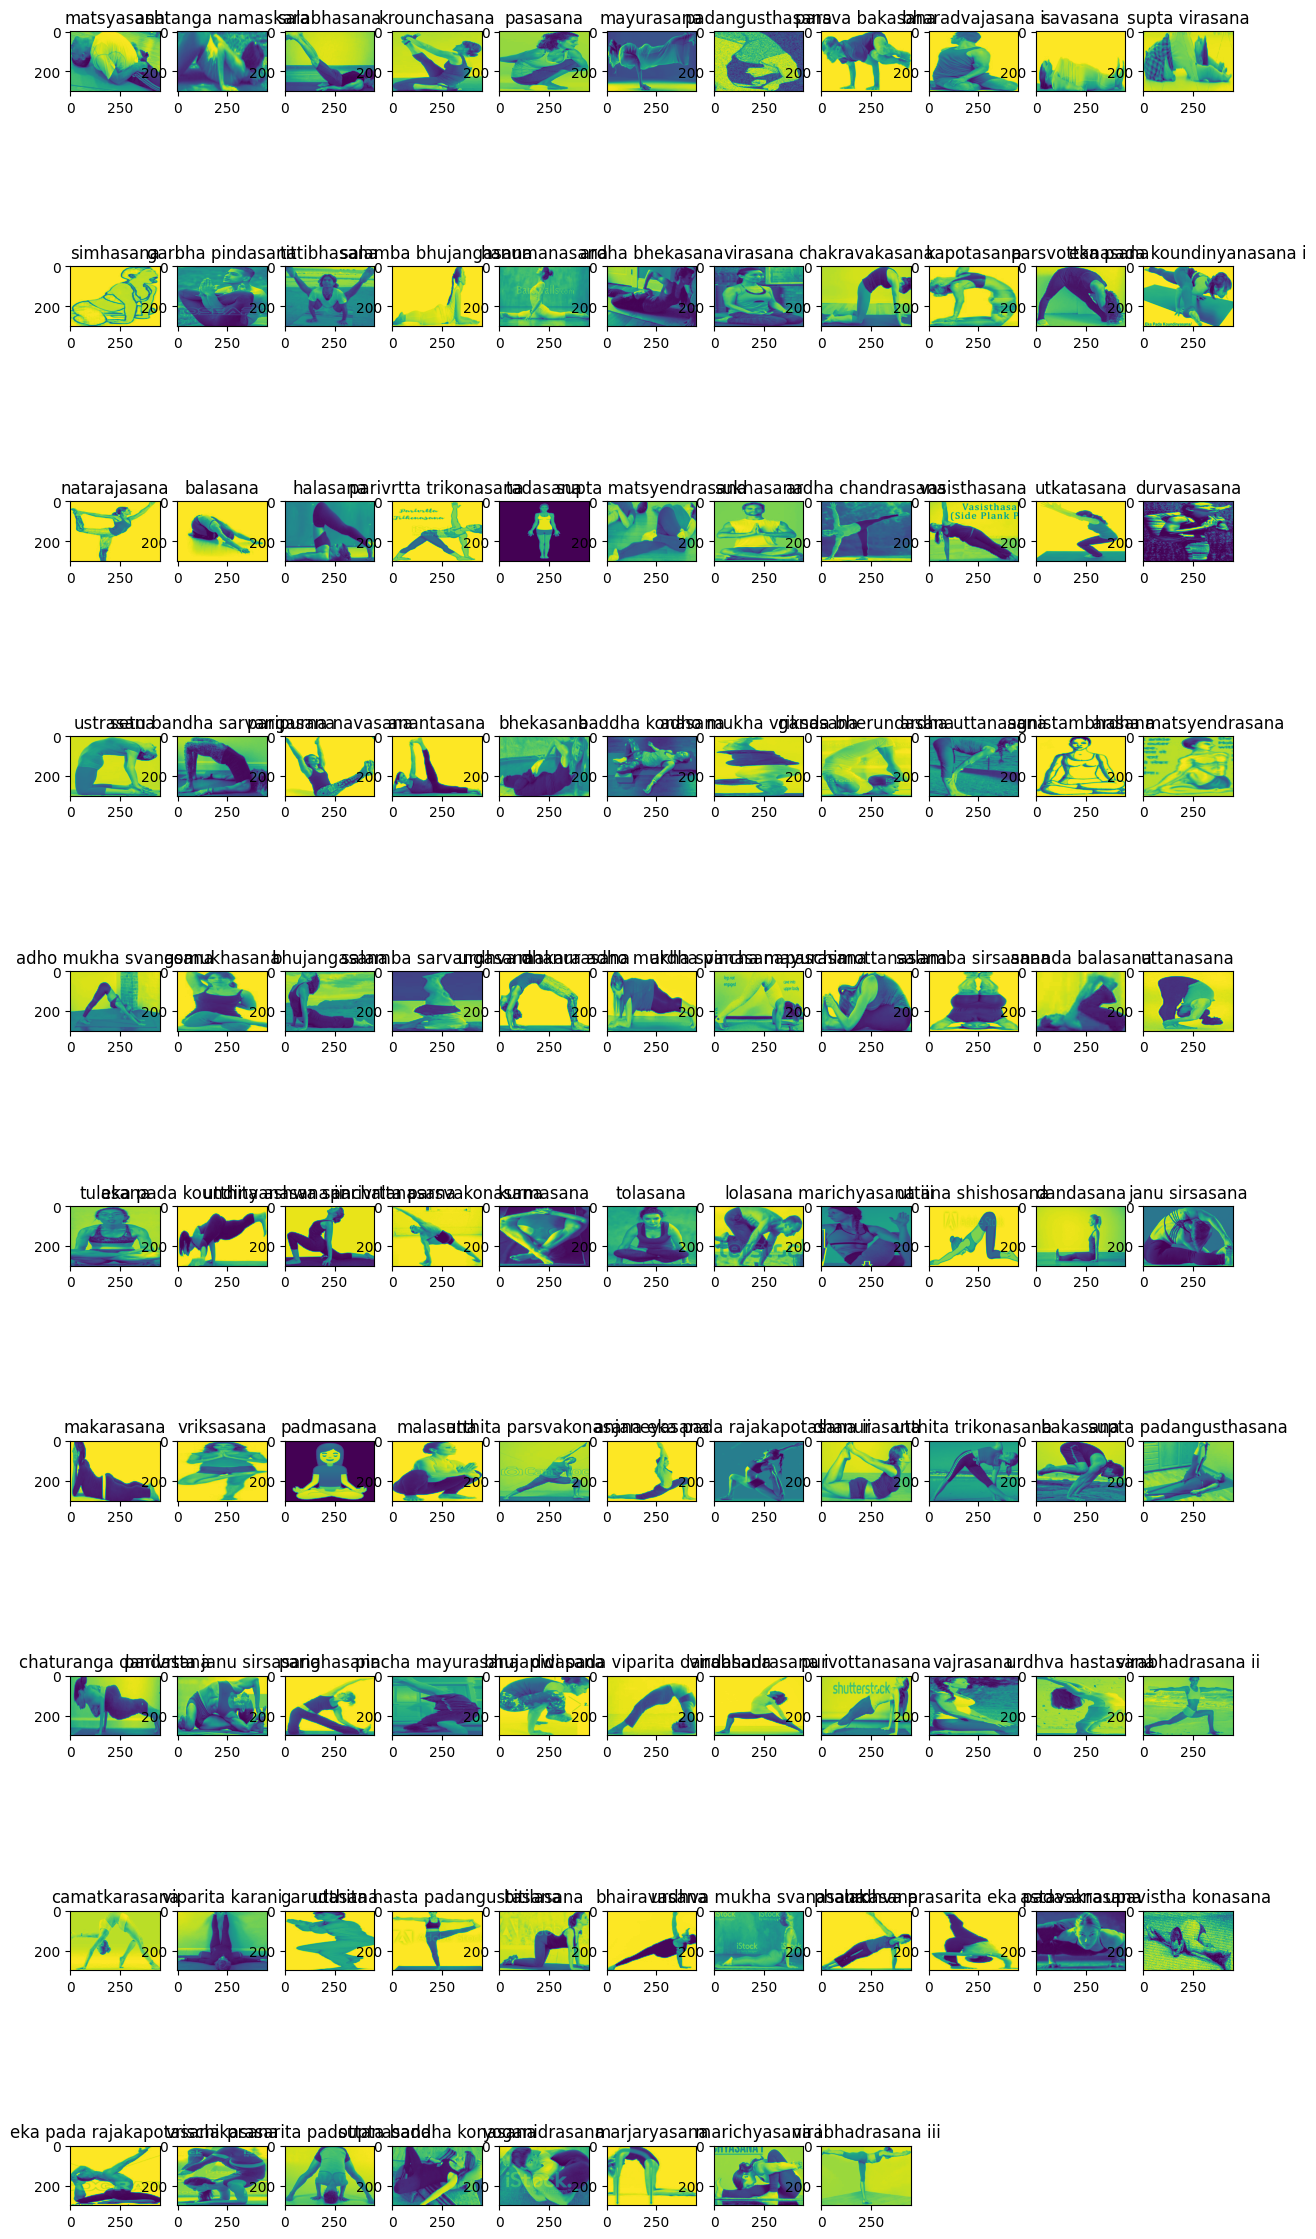

In [34]:
plt.figure(figsize=(15,30))
for i in range(len(img_paths)):
    plt.subplot(10,11,i+1)
    img = cv2.imread(img_paths[i][0],cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (HEIGHT,WIDTH))
    plt.imshow(img)
    plt.title(img_paths[i][1])
plt.show()

In [35]:
def createData(main_folder):
    img_data=[]
    class_data=[]
    for i in os.listdir(main_folder):
        for root, dirs, files in os.walk(main_folder+i):
            for f in files: 
                img_path =main_folder+i+"/"+f
                img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (HEIGHT,WIDTH))
                img = np.array(img).astype('float32')
                img = img/255
                img_data.append(img)
                class_data.append(i)
    return img_data, class_data

In [36]:
X, y = createData(main_folder)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: cHRM: inconsistent chromaticities


In [37]:
unique_classes = np.unique(y)
len(unique_classes)

107

In [38]:
class_dict={}
for i in unique_classes:
    class_dict[i] = y.count(i)

In [39]:
class_dict


{'adho mukha svanasana': 69,
 'adho mukha vriksasana': 59,
 'agnistambhasana': 33,
 'ananda balasana': 59,
 'anantasana': 43,
 'anjaneyasana': 64,
 'ardha bhekasana': 40,
 'ardha chandrasana': 52,
 'ardha matsyendrasana': 90,
 'ardha pincha mayurasana': 47,
 'ardha uttanasana': 66,
 'ashtanga namaskara': 34,
 'astavakrasana': 72,
 'baddha konasana': 70,
 'bakasana': 77,
 'balasana': 71,
 'bhairavasana': 46,
 'bharadvajasana i': 54,
 'bhekasana': 39,
 'bhujangasana': 73,
 'bhujapidasana': 61,
 'bitilasana': 87,
 'camatkarasana': 54,
 'chakravakasana': 70,
 'chaturanga dandasana': 90,
 'dandasana': 60,
 'dhanurasana': 46,
 'durvasasana': 39,
 'dwi pada viparita dandasana': 55,
 'eka pada koundinyanasana i': 51,
 'eka pada koundinyanasana ii': 58,
 'eka pada rajakapotasana': 44,
 'eka pada rajakapotasana ii': 55,
 'ganda bherundasana': 39,
 'garbha pindasana': 36,
 'garudasana': 78,
 'gomukhasana': 72,
 'halasana': 66,
 'hanumanasana': 35,
 'janu sirsasana': 48,
 'kapotasana': 57,
 'kroun

In [40]:
import imageio
import imgaug as ia
import imgaug.augmenters as img_augment


In [41]:
#Data Augmentation for poses with few image files

def dataAugment(file_path):
    horizont= img_augment.Fliplr(p=1.0)
    noise=img_augment.AdditiveGaussianNoise(10,30)
    for root, dirs, files in os.walk(file_path):
        for f in files[:9]:
            fp = file_path+'/'+f
            img = cv2.imread(fp)
            img = horizont.augment_image(img)
            file_name = "gen-"+f
            cv2.imwrite(file_path+"/"+file_name,img)
        for f in files[9:]:
            fp = file_path+'/'+f
            img = cv2.imread(fp)
            img=noise.augment_image(img)
            file_name = "gen-"+f
            cv2.imwrite(file_path+"/"+file_name,img)

In [42]:
padangusthasana_path = main_folder+'/padangusthasana'
dataAugment(padangusthasana_path)

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

In [44]:
y

array([ 50,  50,  50, ..., 102, 102, 102])

In [45]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout, BatchNormalization
from keras.layers import Input, Flatten, Dense, BatchNormalization, Conv2D, MaxPool2D, Activation, MaxPooling2D, Dropout,AveragePooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

In [46]:
X= np.array(X)
y= np.array(y)

In [47]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.1, random_state=42, shuffle=True)


print("train_x shape: {}".format(train_x.shape))
print("train_y shape: {}\n".format(train_y.shape))

print("test_x shape: {}".format(test_x.shape))
print("test_y shape: {}".format(test_y.shape))

train_x shape: (5071, 300, 450)
train_y shape: (5071,)

test_x shape: (627, 300, 450)
test_y shape: (627,)


In [48]:
images = Input((train_x.shape[1], train_x.shape[2], 1,))
x = Conv2D(64, kernel_size=(5,5),padding='same', activation='relu', input_shape = images[0])(images)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, kernel_size=(10,10),activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(5, 5))(x)
x = Conv2D(32, kernel_size=(10,10),activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(5, 5))(x)
x = Flatten()(x)

x = Dense(500, activation='relu')(x)
x = Dense(200, activation='relu')(x)
x = Dense(500, activation='relu')(x)
x = Dense(107)(x)
predictions = Activation("softmax")(x)

# create the model using the layers we defined previously and compliling the model
cnn2 = Model(inputs=images, outputs=predictions)
cnn2.compile(optimizer=Adam(), loss="sparse_categorical_crossentropy", metrics=["acc"])

# print out a summary of the model achitecture
print(cnn2.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300, 450, 1)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 300, 450, 64)      1664      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 150, 225, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 225, 64)      409664    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 45, 32)        2048

In [49]:
# since the subjects have different numbers of images, 
# we need to balance how much each subject contributes to the cross-entropy loss
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_y),
                                        y = train_y                                                    
                                    )
# class_weights = dict(zip(np.unique(train_y), class_weights))

# train model
cnn2.fit(train_x, train_y, validation_data=(val_x, val_y), 
               epochs=30, batch_size=1000, verbose=1)

# evaluate model, get train/test accuracy
train_pred = np.argmax(cnn2.predict(train_x), axis=1)
test_pred = np.argmax(cnn2.predict(test_x), axis=1)
print("\nTraining accuracy using first CNN model: {}".format(accuracy_score(train_y, train_pred)))
print("Testing accuracy using first CNN model: {}\n".format(accuracy_score(test_y, test_pred)))


Epoch 1/30
6/6 [==============================] - 353s 57s/step - loss: 4.6556 - acc: 0.0355 - val_loss: 4.6438 - val_acc: 0.0479
Epoch 2/30
6/6 [==============================] - 358s 58s/step - loss: 4.6099 - acc: 0.0448 - val_loss: 4.5895 - val_acc: 0.0479
Epoch 3/30
6/6 [==============================] - 347s 57s/step - loss: 4.5897 - acc: 0.0448 - val_loss: 4.6258 - val_acc: 0.0479
Epoch 4/30
6/6 [==============================] - 354s 58s/step - loss: 4.6078 - acc: 0.0448 - val_loss: 4.5882 - val_acc: 0.0479
Epoch 5/30
6/6 [==============================] - 382s 62s/step - loss: 4.5533 - acc: 0.0448 - val_loss: 4.5299 - val_acc: 0.0479
Epoch 6/30
6/6 [==============================] - 374s 61s/step - loss: 4.5022 - acc: 0.0448 - val_loss: 4.6189 - val_acc: 0.0479
Epoch 7/30
6/6 [==============================] - 380s 61s/step - loss: 4.5564 - acc: 0.0448 - val_loss: 4.7229 - val_acc: 0.0479
Epoch 8/30
6/6 [==============================] - 365s 60s/step - loss: 4.4947 - acc: 0.04

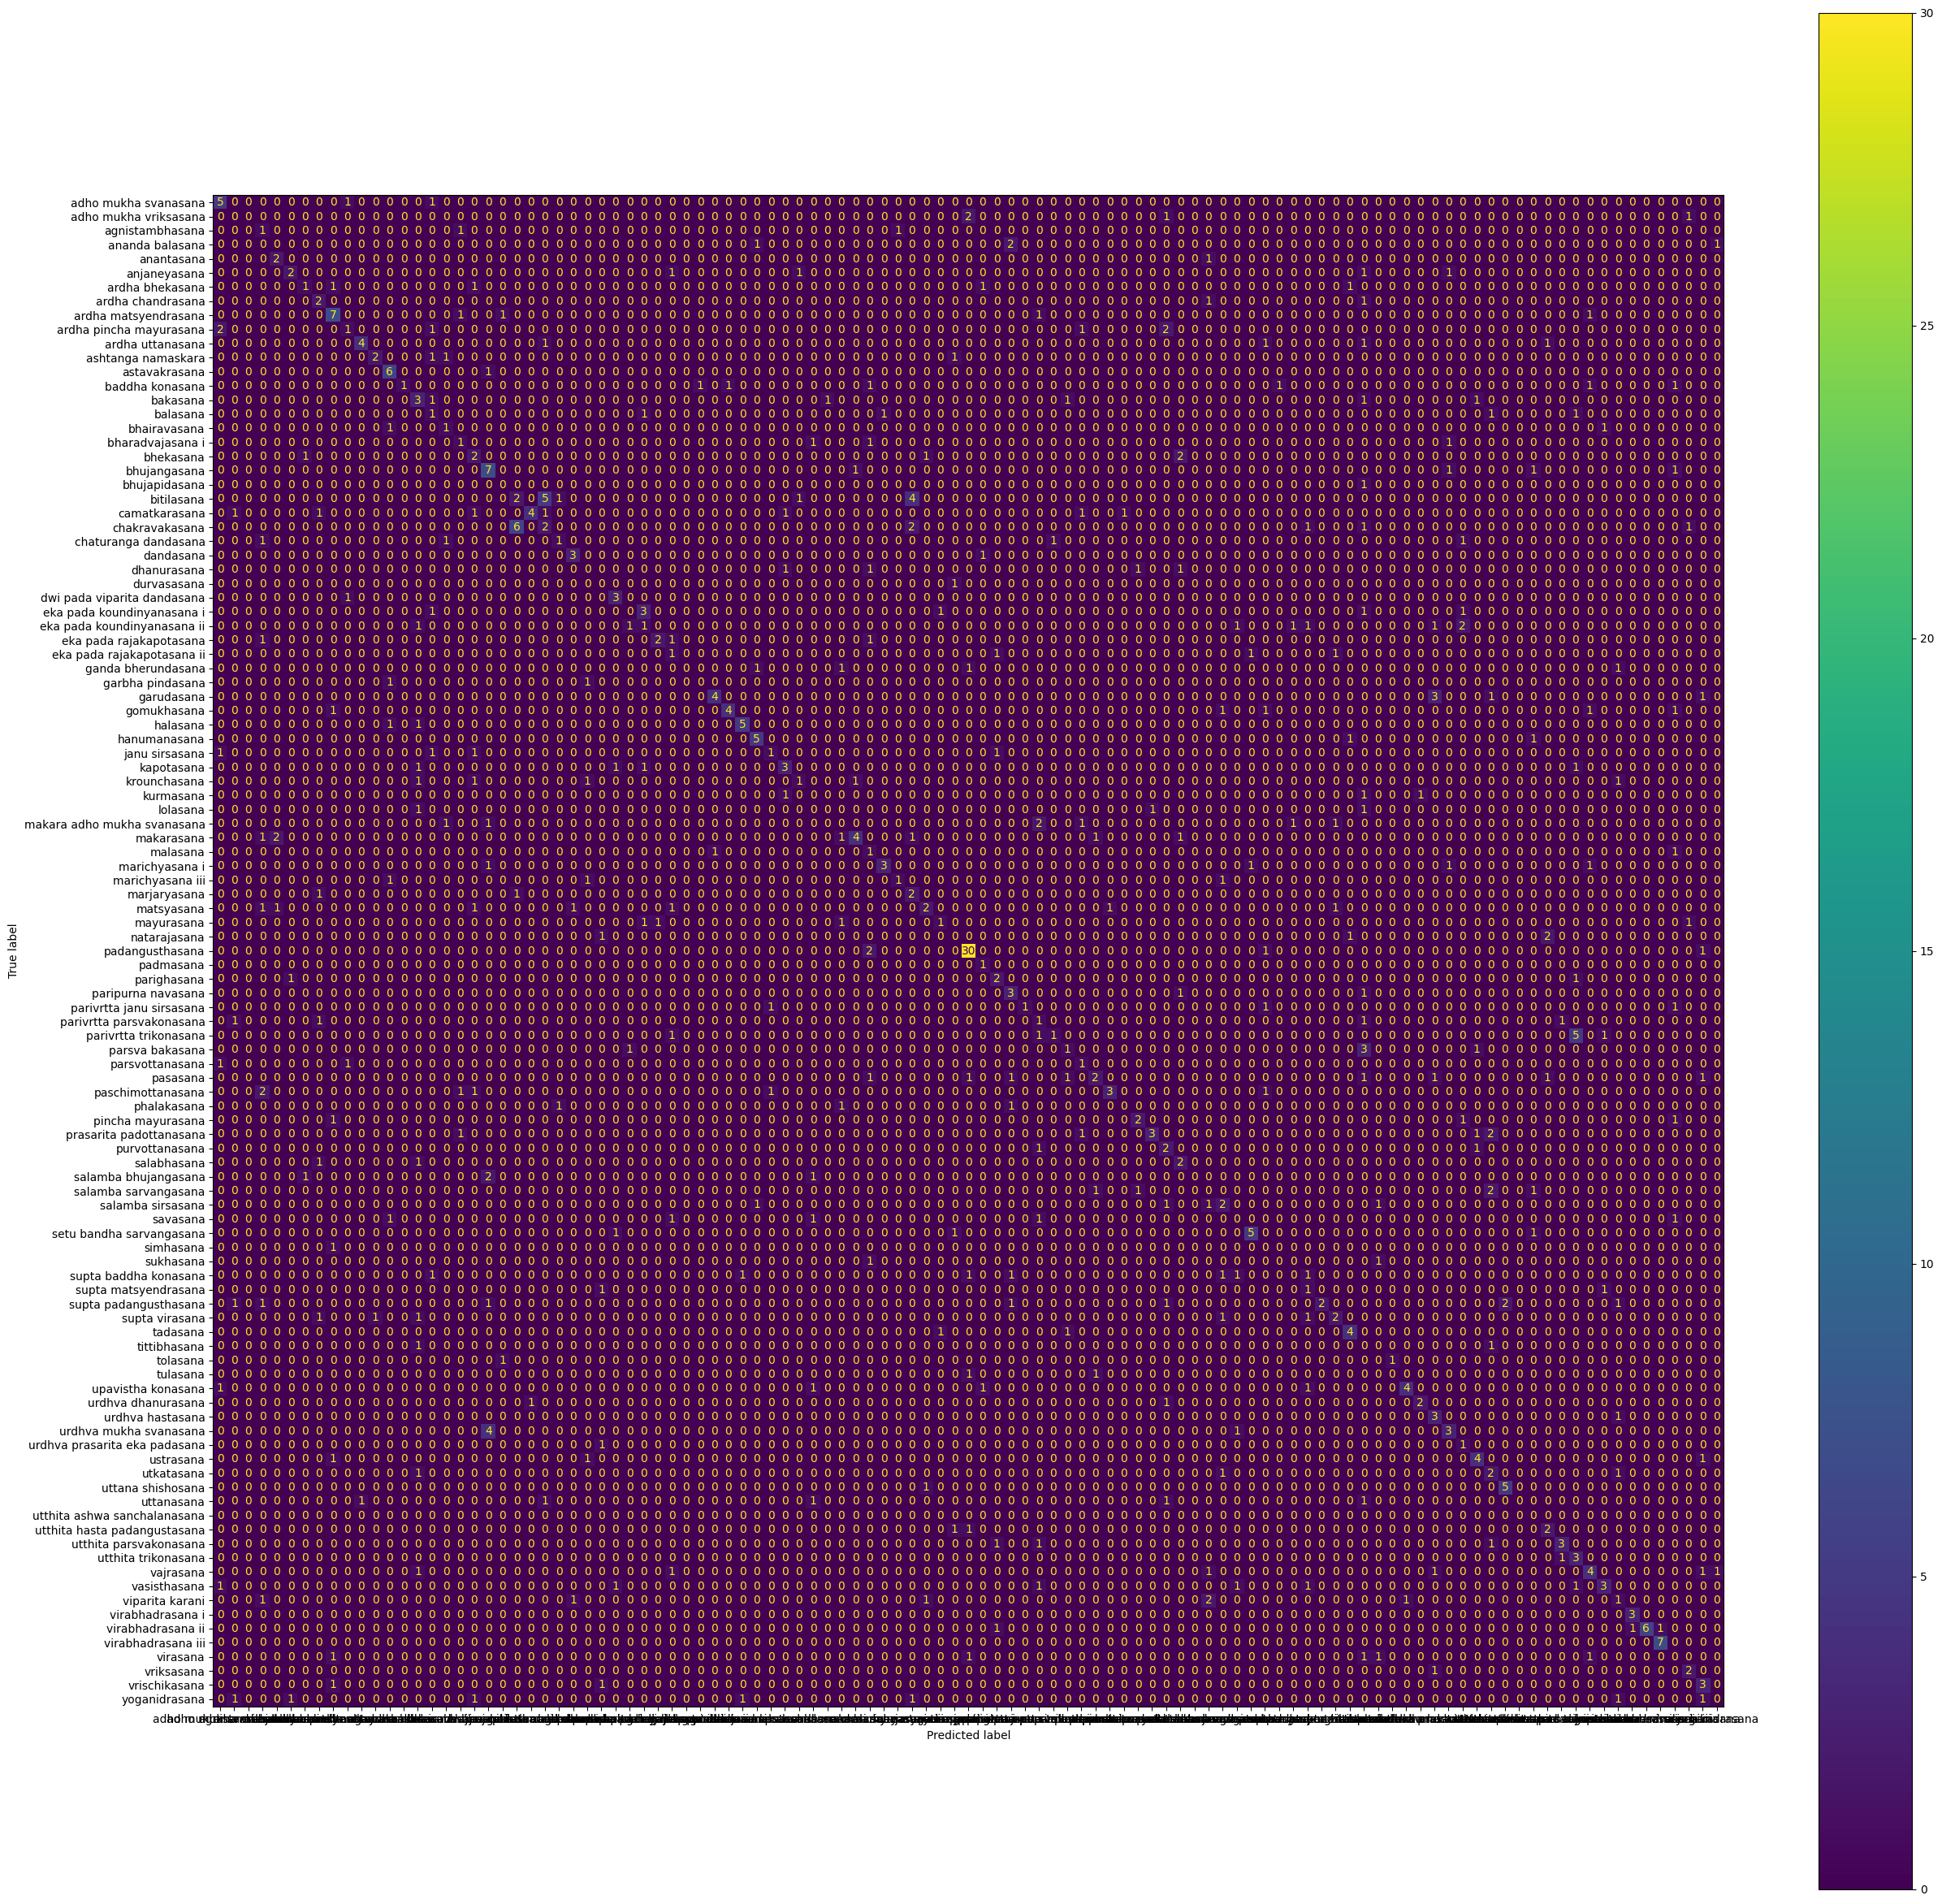

In [63]:
import sklearn.metrics as metrics
from matplotlib.pyplot import figure

confusion_matrix = metrics.confusion_matrix(test_y, test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = unique_classes)

fig, ax = plt.subplots(figsize=(30,30))
cm_display.plot(ax=ax)
plt.show()

In [57]:
from sklearn.metrics import classification_report
print(classification_report(test_y, test_pred, target_names=unique_classes, digits=4))

                               precision    recall  f1-score   support

         adho mukha svanasana     0.4545    0.7143    0.5556         7
        adho mukha vriksasana     0.0000    0.0000    0.0000         4
              agnistambhasana     0.0000    0.0000    0.0000         3
              ananda balasana     0.0000    0.0000    0.0000         4
                   anantasana     0.4000    0.6667    0.5000         3
                 anjaneyasana     0.5000    0.3333    0.4000         6
              ardha bhekasana     0.3333    0.2000    0.2500         5
            ardha chandrasana     0.2857    0.5000    0.3636         4
         ardha matsyendrasana     0.5000    0.6364    0.5600        11
      ardha pincha mayurasana     0.2500    0.1429    0.1818         7
             ardha uttanasana     0.8000    0.5000    0.6154         8
           ashtanga namaskara     0.6667    0.4000    0.5000         5
                astavakrasana     0.5455    0.8571    0.6667         7
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.